# Reading & Understanding Data

## Reading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

advertising = pd.read_csv('C:/Users/MRE/Documents/GitHub/Data-Analysis-Linear-Regression/Company_data.csv')

advertising.head(-10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
185,205.0,45.1,19.6,22.6
186,139.5,2.1,26.6,10.3
187,191.1,28.7,18.2,17.3
188,286.0,13.9,3.7,20.9


## Understanding Data

In [2]:
advertising.shape

(200, 4)

In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing the Data

## Pairplot Visualization

<Figure size 1440x1080 with 0 Axes>

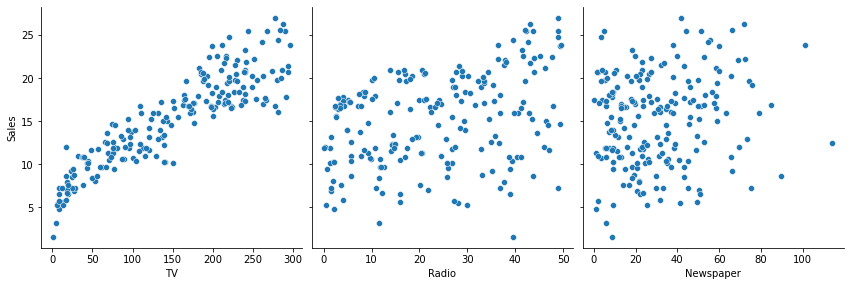

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
sns.pairplot(
    data=advertising,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    size=4,
    aspect=1,
    kind='scatter'
)
plt.show()

## Heatmap Visualization

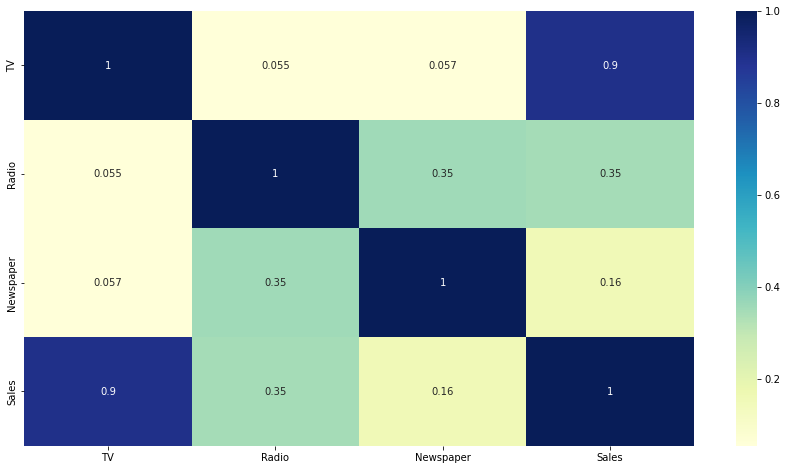

In [6]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    advertising.corr(),
    cmap='YlGnBu',
    annot=True
)
plt.show()

<p> As we can see from the heatmap, most correlated one is of course <b>TV</b>.</p>

# Performing Simple Linear Regression

## Creating X and Y

In [7]:
X = advertising['TV']
y = advertising['Sales']

## Creating Train and Test sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("X_train: ",X_train)
print("X_train: ",X_test)
print("y_train: ",y_train)
print("y_train: ",y_test)

X_train:  74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64
X_train:  126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: fl

## Training the Model

In [13]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

#Fitting Regression Model
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    6.948683
TV       0.054546
dtype: float64

In [14]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        00:33:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the Model

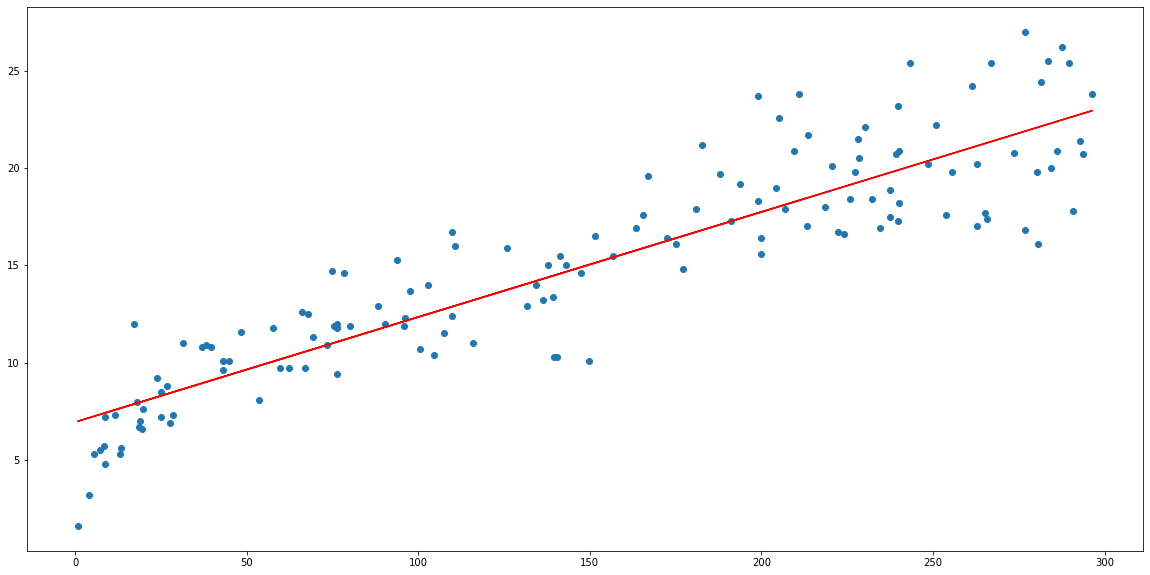

In [16]:
# Visualizating the regression line

plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()